<a href="https://colab.research.google.com/github/apchavezr/-Analisis_Grandes_Volumenes_Datos/blob/main/Dask_Altura_Visualizacion_Distribuida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Procesamiento distribuido con Dask y visualización

Este notebook presenta un ejemplo de uso de **Dask** para análisis distribuido de datos y su visualización, usando un dataset de estaturas y pesos. Ilustra cómo esta herramienta permite escalar operaciones sobre grandes volúmenes de datos en Python de forma eficiente.

### Objetivos:
- Leer un archivo CSV de tamaño considerable usando Dask.
- Calcular estadísticas básicas sobre estaturas.
- Visualizar la distribución de alturas mediante un histograma.


In [1]:

!pip install -q dask[complete] matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.3 MB/s eta 0:00:00


In [2]:

import dask.dataframe as dd
import matplotlib.pyplot as plt

# Cargar el dataset
url = 'https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv'
df = dd.read_csv(url)

# Limpiar nombres de columnas
df.columns = [col.strip().replace('"','') for col in df.columns]

# Calcular la media de estatura
media_estatura = df['Height(Inches)'].mean().compute()

print(f"Estatura promedio: {media_estatura:.2f} pulgadas")


Estatura promedio: 67.95 pulgadas


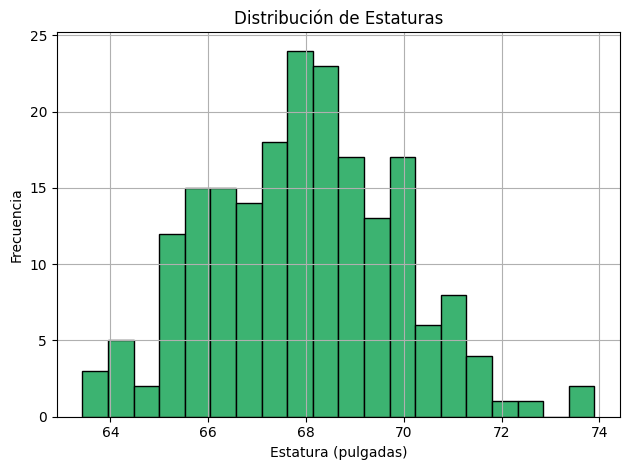

In [3]:

# Convertir a pandas para visualización (solo columna de interés)
df_pandas = df['Height(Inches)'].compute()

# Visualizar la distribución de estaturas
plt.hist(df_pandas, bins=20, color='mediumseagreen', edgecolor='black')
plt.title('Distribución de Estaturas')
plt.xlabel('Estatura (pulgadas)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()



### Conclusión

Este ejercicio demuestra cómo Dask permite manejar archivos CSV grandes y realizar análisis distribuidos de manera eficiente. Además, al integrarse con bibliotecas como Matplotlib, facilita la generación de visualizaciones comprensibles para explorar los datos antes de aplicar técnicas más complejas de modelado.

Este flujo de trabajo es útil en contextos de salud, educación o investigación social, donde se manejan bases de datos voluminosas con métricas antropométricas o poblacionales.
